# Итоговая работа

In [3]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics
import re
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

%matplotlib inline

1. Загрузить файл hr.csv 

In [10]:
path = r'C:\Users\sesa514967\Desktop\pthon\итоговая работа'.replace('\\','/') + '/'
hr = pd.read_excel(path + 'HR.xlsx')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


1. satisfaction_level - измеряется от 0 до 1
2. last_evaluation - измеряется от 0 до 1
3. number_project
4. average_montly_hours
5. time_spend_company
6. Work_accident - да или нет
7. left - да или нет
8. promotion_last_5years - да или нет
9. sales - принадлежность к отделу
10. salary - уровень ЗП


In [17]:
# посмотрим типы данных
hr.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [21]:
# выберем данные, которые являются числовыми

hr_num = hr.iloc[:,:8]
hr_num[:2]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0


C:\Users\sesa514967\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


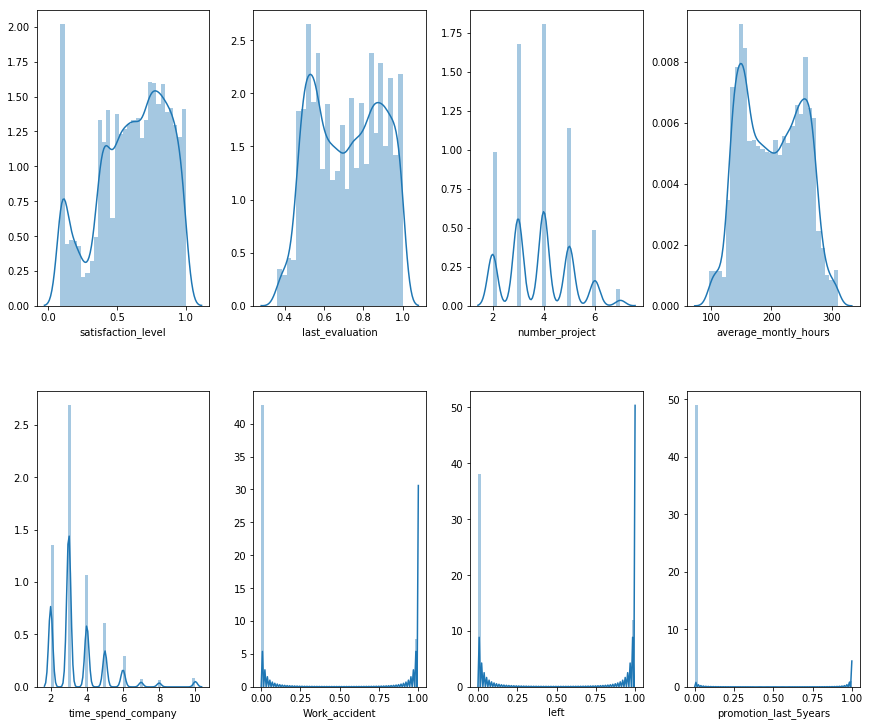

In [25]:
# посмотрим на графики распределений

fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(12, 10))
index = 0
axs = axs.flatten()
for k,v in hr_num.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

Видно, что Work_accident, left и promotion_last_5years - это распределение Бернулли.
number_project и time_spend_company похожи на Биномиальные

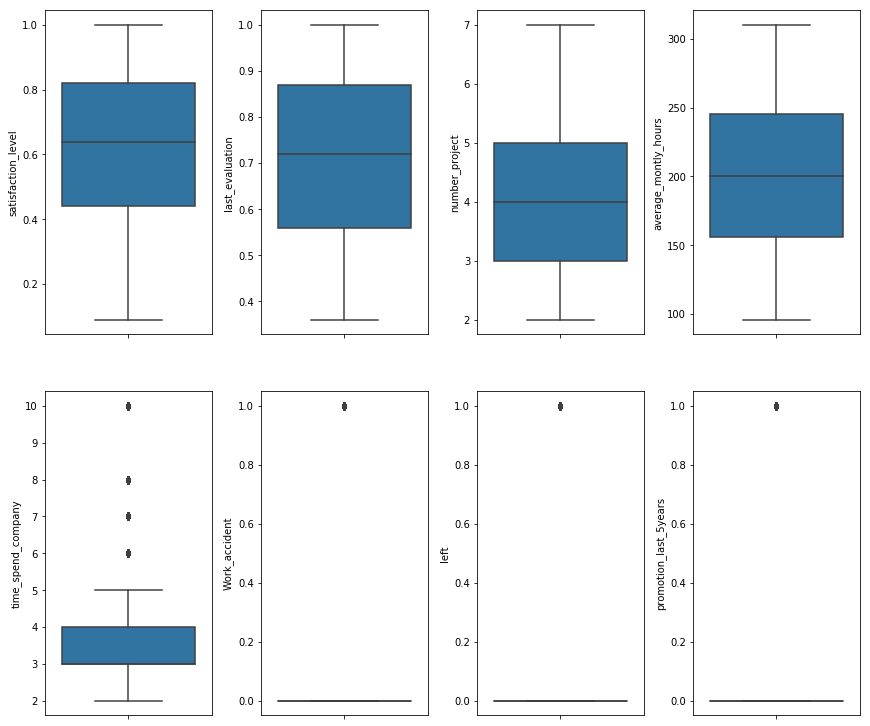

In [27]:
# посмотрим, есть ли выбросы
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(12, 10))
index = 0
axs = axs.flatten()
for k,v in hr_num.items():
    sns.boxplot(y=k, data=hr, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

Видно, что выбросы имеет только показатель time_spend_company

In [58]:
# посмотрим на % выбросов
for k, v in hr_num.items():
    # считаем точки в квантиле 25% от медианы
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        # выбросы находятся за этими точками
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(hr_num)[0]
        print("Выбросы колонки %s = %.2f%%" % (k, perc))

Выбросы колонки satisfaction_level = 0.00%
Выбросы колонки last_evaluation = 0.00%
Выбросы колонки number_project = 0.00%
Выбросы колонки average_montly_hours = 0.00%
Выбросы колонки time_spend_company = 8.55%
Выбросы колонки Work_accident = 100.00%
Выбросы колонки left = 100.00%
Выбросы колонки promotion_last_5years = 100.00%


Будем считать такую долю выбросов незначительной

2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение) 

In [11]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


3. Рассчитать и визуализировать корреляционную матрицу для переменных

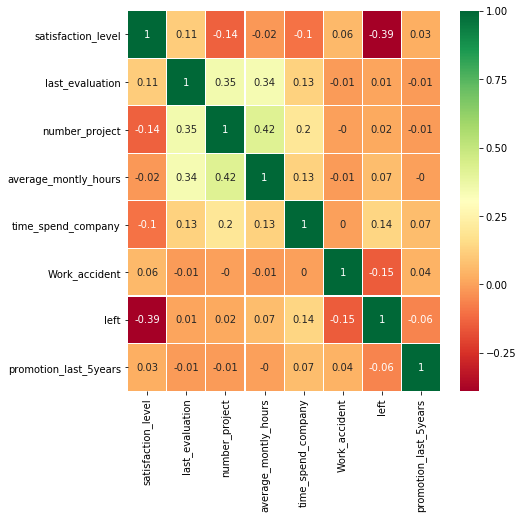

In [67]:
correlation_matrix = hr.corr(method ='pearson').round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='RdYlGn',linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(7,7)
plt.show()

Видно, что показатели мало корреклируют между собой. Наиболее высокий показатель (0.42 number_project и average_montly_hours) все равно не достигает даже отметки 50%

4. Визуализировать несколько взаимосвязей между переменными

C:\Users\sesa514967\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


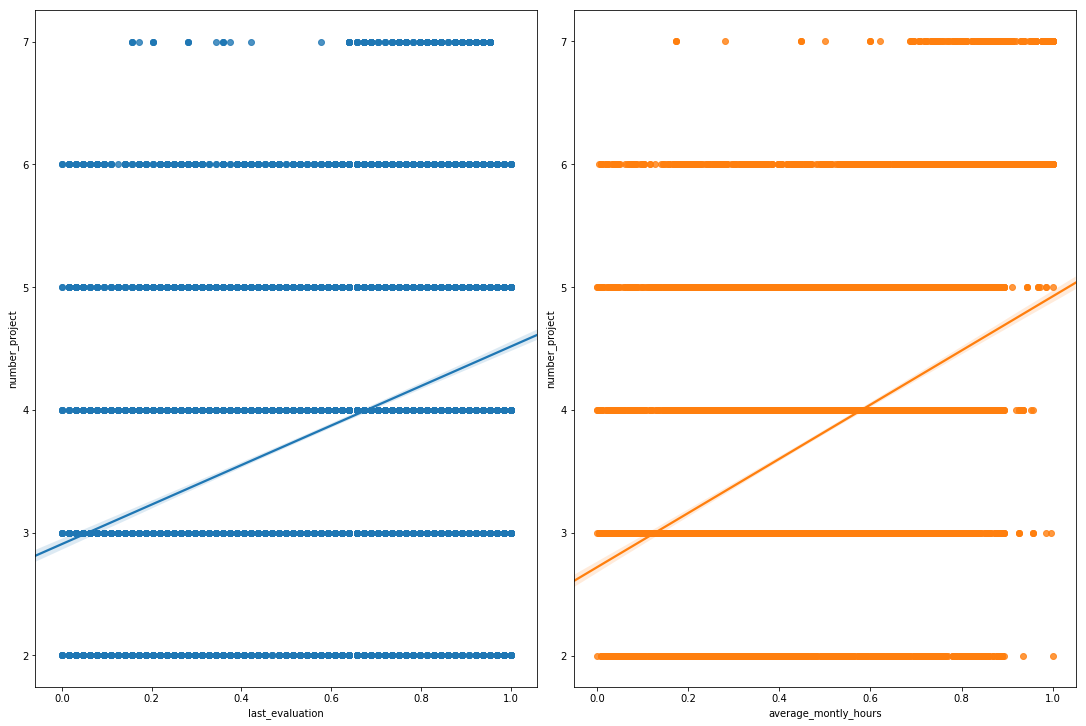

In [79]:
# т.к. наибольший уровень корреляции между показателями number_project и average_montly_hours, визуализируем его
# также есть зависимость у number_project и last_evaluation. рассмотрим также эти показатели
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['last_evaluation', 'average_montly_hours']
x = hr.loc[:,column_sels]
y = hr['number_project']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(15, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными

C:\Users\sesa514967\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


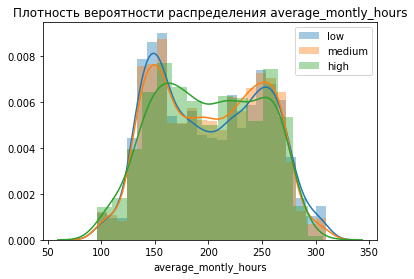

In [81]:
# Посмотрим, как отличаются вероятностные распределения c высокой и низкой зарплатой по параметру average_montly_hours
l_average_montly_hours = hr[hr['salary']=='low']['average_montly_hours']
m_average_montly_hours = hr[hr['salary']=='medium']['average_montly_hours']
h_average_montly_hours = hr[hr['salary']=='high']['average_montly_hours']
sns.distplot(l_average_montly_hours)
sns.distplot(m_average_montly_hours)
sns.distplot(h_average_montly_hours)
plt.title('Плотность вероятности распределения average_montly_hours')
plt.legend(['low', 'medium','high'])
plt.show()

In [83]:
# посмотрим медианы
l = l_average_montly_hours.mean()
m = m_average_montly_hours.mean()
h = h_average_montly_hours.mean()
print (l, m, h)

200.9965828321487 201.33834936394663 199.86742118027485


In [85]:
# медианы примерно одинаковы, поэтому рассмотрим еще и квантили
print('Квантили по low salary')
l_average_montly_hours.quantile([.1, .25, .5, .75]) 

Квантили по женщинам


0.10    137.0
0.25    155.0
0.50    199.0
0.75    246.0
Name: average_montly_hours, dtype: float64

In [86]:
print('Квантили по medium salary')
m_average_montly_hours.quantile([.1, .25, .5, .75]) 

Квантили по medium salary


0.10    138.0
0.25    156.0
0.50    201.0
0.75    245.0
Name: average_montly_hours, dtype: float64

In [87]:
print('Квантили по high salary')
h_average_montly_hours.quantile([.1, .25, .5, .75]) 

Квантили по high salary


0.10    137.6
0.25    161.0
0.50    199.0
0.75    241.0
Name: average_montly_hours, dtype: float64

видно, что у первой выборки разброс больше, чем у последней

Генеральная совокупность - это сотрудники с любым типом зарплаты. 

C:\Users\sesa514967\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


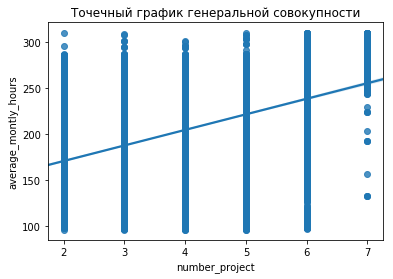

In [89]:
# возьмем ГС два параметра number_project и average_montly_hours и построим точечный график

number_project = hr['number_project']
average_montly_hours = hr['average_montly_hours']
sns.regplot(x= number_project, y=average_montly_hours,data=hr, fit_reg=True)
plt.xlabel('number_project')
plt.ylabel('average_montly_hours')
plt.title('Точечный график генеральной совокупности')
plt.show()

Пусть выборкой будут люди с разным типом зарплат

C:\Users\sesa514967\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


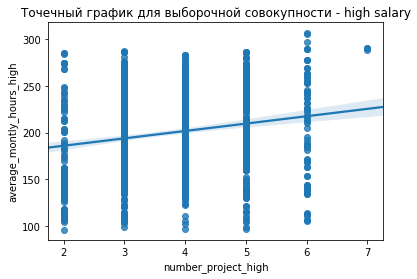

In [94]:
# построим точечный график для выборки для людей с высоким уровнем ЗП

number_project_high = hr[hr['salary']=='high']['number_project']
average_montly_hours_high = hr[hr['salary']=='high']['average_montly_hours']
sns.regplot(x= number_project_high, y=average_montly_hours_high,data=hr, fit_reg=True)
plt.xlabel('number_project_high')
plt.ylabel('average_montly_hours_high')
plt.title('Точечный график для выборочной совокупности - high salary')
plt.show()

C:\Users\sesa514967\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


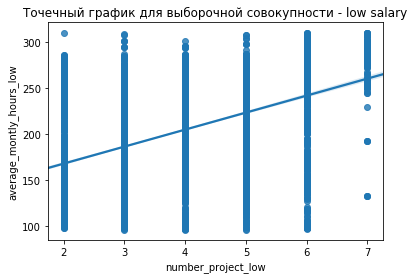

In [95]:
# а также график для людей с низким уровнем зп

number_project_low = hr[hr['salary']=='low']['number_project']
average_montly_hours_low = hr[hr['salary']=='low']['average_montly_hours']
sns.regplot(x= number_project_low, y=average_montly_hours_low,data=hr, fit_reg=True)
plt.xlabel('number_project_low')
plt.ylabel('average_montly_hours_low')
plt.title('Точечный график для выборочной совокупности - low salary')
plt.show()

Рассмотрим нулевую гипотезу о том, что выборочные средние значения для двух выборок равны и альтернативную о том, что выборочные средние не равны

In [96]:
# возьмем выборку людей с высокими и низкими зарплатами

number_project_low = hr[hr['salary']=='low']['number_project']

number_project_high = hr[hr['salary']=='high']['number_project']

stats.ttest_ind(number_project_low, number_project_high)

Ttest_indResult(statistic=0.8473615354719396, pvalue=0.3968173527404072)

T-значение 0.85, p-value равно 0.40, что намного больше стандартной альфа ошибки 0.05, поэтому мы принимаем нулевую гипотезу и можем сказать, что не имеется статистического различия количеством проектов у людей с высокой и низкой заработной платой в целом.

6. Рассчитать сколько работников работает в каждом департаменте 

In [98]:
count_by_department = hr.groupby(['sales'])['sales'].count().reset_index(name='Count')
count_by_department

,sales,Count
0,IT,1227
1,RandD,787
2,accounting,767
3,hr,739
4,management,630
5,marketing,858
6,product_mng,902
7,sales,4140
8,support,2229
9,technical,2720


7. Показать распределение сотрудников по зарплатам

In [105]:
count_by_salary = hr.groupby(['salary'])['sales'].count().reset_index(name='Count')
count_by_salary

,salary,Count
0,high,1237
1,low,7316
2,medium,6446


8. Показать распределение сотрудников по зарплатам совместно с департаментами

In [106]:
count_by_salary_pvt = hr.pivot_table(index=['sales','salary'], values = 'number_project', aggfunc='count')
count_by_salary_pvt

number_project
sales       salary                
IT          high                83
            low                609
            medium             535
RandD       high                51
            low                364
            medium             372
accounting  high                74
            low                358
            medium             335
hr          high                45
            low                335
            medium             359
management  high               225
            low                180
            medium             225
marketing   high                80
            low                402
            medium             376
product_mng high                68
            low                451
            medium             383
sales       high               269
            low               2099
            medium            1772
support     high               141
            low               1146
            medium             942
technical   high               201
            low               1372
            medium            1147

9. Сколько сотрудников покинули компанию

In [109]:
print('Компанию покинул ', hr['left'].sum(), ' сотрудник')


Компанию покинул  3571  сотрудник


10. Проверить несколько гипотез для данных,чтобы понять почему сотрудники покидают компанию

гипотреза 1 - покидают компанию сотрудники, у которых больше всего проектов

In [110]:
# рассмотрим 1ую гипотезу

project_left = hr[hr['left']==1]['number_project']

project_stay = hr[hr['left']==0]['number_project']

stats.ttest_ind(project_left, project_stay)

Ttest_indResult(statistic=2.9138564358459607, pvalue=0.0035752138709418788)

Высокий показатель t-value=2.91 и низкий показатель p-value=0.004 говорит о том, что группы статистически зависимы.

гипотреза 2 - покидают компанию сотрудники, у которых наименьший уровень удовлетворенности

In [112]:
# рассмотрим 2ую гипотезу

satisfaction_level_left = hr[hr['left']==1]['satisfaction_level']

satisfaction_level_stay = hr[hr['left']==0]['satisfaction_level']

stats.ttest_ind(satisfaction_level_left, satisfaction_level_stay)

Ttest_indResult(statistic=-51.61280155890104, pvalue=0.0)

t-value отрицательно, p-value=0, можно предположить обратную зависимость

гипотреза 3 - покидают компанию сотрудники, которые больше всего времени провели в компании (им стало скучно, например)

In [113]:
# рассмотрим 3ю гипотезу

time_spend_company_left = hr[hr['left']==1]['time_spend_company']

time_spend_company_stay = hr[hr['left']==0]['time_spend_company']

stats.ttest_ind(time_spend_company_left, time_spend_company_stay)

Ttest_indResult(statistic=17.924210234916142, pvalue=4.207680457692835e-71)

Высокий показатель t-value и низкий показатель p-value говорит о том, что группы можно считать зависимыми.